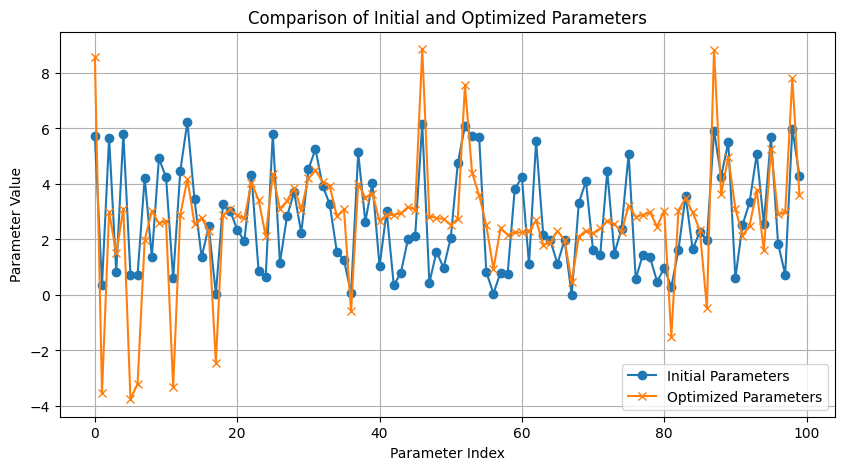

In [6]:
# this profile is used to test the modules
import numpy as np
import matplotlib.pyplot as plt
import os
from modules.Optimization_2_qubits import qubits2



T_sample = 10.0
sample = qubits2(T_sample, N=99, )
    

initial_parameter = sample.parameter
parameter_optimized = sample.optimize()[1]  # Get optimized parameters


# print(f"Initial Hamiltonian List:{H_list_initial[0]},{H_list_initial[1]}")
# print(f"Optimized Hamiltonian List:{H_list_optimized[0]},{H_list_optimized[1]}")

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(initial_parameter)), initial_parameter, label='Initial Parameters', marker='o')
plt.plot(np.arange(len(parameter_optimized)), parameter_optimized, label='Optimized Parameters', marker='x')
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Value')
plt.title('Comparison of Initial and Optimized Parameters')
plt.legend()
plt.grid()
plt.show()

# current_path = os.path.dirname(os.path.abspath(__file__))
# path = os.path.join(current_path,"Output")
# path = os.path.join(path, "parameter_comparison.png")
# plt.savefig(path, dpi=300)
# print("figure saved as Output/parameter_comparison.png")



In [ ]:
from scipy.optimize import minimize, differential_evolution

sample.parameter = initial_parameter

def Differential_evolution_test(sample):
    bounds = [(0, 2 * np.pi)] * len(sample.parameter)
    result = differential_evolution(sample.loss, bounds, maxiter=2000, polish=True)
    return result.fun, result.x

parameter_globallyoptimized = Differential_evolution_test(sample) [1]

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(initial_parameter)), initial_parameter, label='Initial Parameters', marker='o')
plt.plot(np.arange(len(parameter_optimized)), parameter_optimized, label='Optimized Parameters', marker='x')
plt.plot(np.arange(len(parameter_globallyoptimized)), parameter_optimized, label='Globally Optimized Parameters', marker='x')
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Value')
plt.title('Comparison of Initial, Optimized and Globally Optimized Parameters')
plt.legend()
plt.grid()
plt.show()
